In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize

In [2]:
project_path = os.path.dirname(os.getcwd())
dataset_path = os.path.join(project_path, 'datasets')
file_name = 'filtered_dataset_with_lyrics.csv'

In [3]:
df = pd.read_csv(os.path.join(dataset_path, file_name), index_col=0)

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head(5))

,song_id_from_src,dataset,title,artist,genre,arousal_mean,arousal_std,valence_mean,valence_std,emotion_4Q,emotion_2Q,lyrics,language,general_genre
2,5,PMEmo2019,No Heart,21 Savage,NaN,0.150000,0.175000,0.200000,0.203101,sad,negative,"[Intro] Southside, Southside on the, Southside...",en,NaN
14,18,PMEmo2019,Send My Love (To Your New Lover),Adele,Soul,0.800000,0.139194,0.837500,0.097628,happy,positive,"[Intro] Just the guitar? Okay, cool [Verse 1]...",en,Jazz
15,19,PMEmo2019,Water Under The Bridge,Adele,NaN,0.762500,0.117925,0.750000,0.136931,happy,positive,[Verse 1] If you're not the one for me Then ho...,en,NaN
17,21,PMEmo2019,Faded,Alan Walker,NaN,0.862500,0.117925,0.775000,0.156125,happy,positive,[Verse 1] You were the shadow to my light Did ...,en,NaN
19,25,PMEmo2019,Scars To Your Beautiful,Alessia Cara,NaN,0.761364,0.135413,0.784091,0.151610,happy,positive,[Verse 1] She just wants to be beautiful She g...,en,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 2 to 3510
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id_from_src  1956 non-null   object 
 1   dataset           1956 non-null   object 
 2   title             1956 non-null   object 
 3   artist            1956 non-null   object 
 4   genre             1280 non-null   object 
 5   arousal_mean      107 non-null    float64
 6   arousal_std       107 non-null    float64
 7   valence_mean      107 non-null    float64
 8   valence_std       107 non-null    float64
 9   emotion_4Q        1956 non-null   object 
 10  emotion_2Q        1956 non-null   object 
 11  lyrics            1956 non-null   object 
 12  language          1956 non-null   object 
 13  general_genre     1254 non-null   object 
dtypes: float64(4), object(10)
memory usage: 229.2+ KB


In [6]:
df.isna().sum()

song_id_from_src       0
dataset                0
title                  0
artist                 0
genre                676
arousal_mean        1849
arousal_std         1849
valence_mean        1849
valence_std         1849
emotion_4Q             0
emotion_2Q             0
lyrics                 0
language               0
general_genre        702
dtype: int64

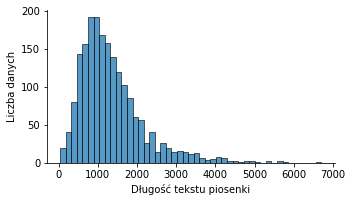

In [7]:
g = sns.displot(df['lyrics'].str.len())
g.fig.set_figwidth(5)
g.fig.set_figheight(2.5)
plt.xlabel('Długość tekstu piosenki')
plt.ylabel('Liczba danych')
plt.savefig('lyrics_length_distr.pdf', bbox_inches = "tight")

In [8]:
words_num = df.apply(lambda x: len(word_tokenize(x['lyrics'])), axis=1)

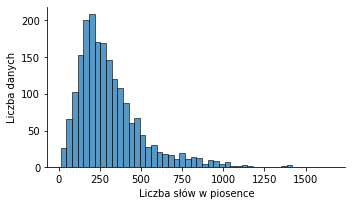

In [9]:
g = sns.displot(words_num)
g.fig.set_figwidth(5)
g.fig.set_figheight(2.5)
plt.xlabel('Liczba słów w piosence')
plt.ylabel('Liczba danych')
plt.savefig('words_distr.pdf', bbox_inches = "tight")

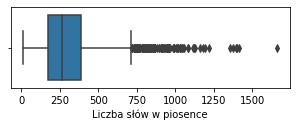

In [10]:
fig, ax = plt.subplots(figsize=(5, 1.5))
sns.boxplot(x=words_num, ax=ax)
plt.xlabel('Liczba słów w piosence')
plt.savefig('boxplot_words.pdf', bbox_inches = "tight")

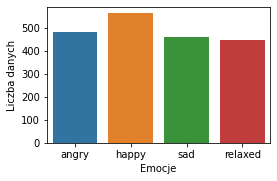

In [11]:
fig, ax = plt.subplots(figsize=(4, 2.5))
sns.countplot(x="emotion_4Q", data=df, order=['angry', 'happy', 'sad', 'relaxed'], ax=ax)
plt.xlabel('Emocje')
plt.ylabel('Liczba danych')
plt.savefig('emotion_distr.pdf', bbox_inches = "tight")

In [12]:
sorted(df.emotion_4Q.unique())

['angry', 'happy', 'relaxed', 'sad']

<AxesSubplot:xlabel='emotion_2Q', ylabel='count'>

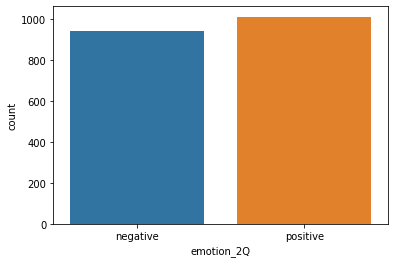

In [13]:
sns.countplot(x="emotion_2Q", data=df)

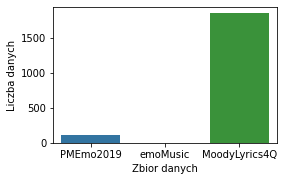

In [14]:
fig, ax = plt.subplots(figsize=(4, 2.5))
sns.countplot(x="dataset", data=df, ax=ax)
plt.xlabel('Zbior danych')
plt.ylabel('Liczba danych')
plt.savefig('dataset_distr.pdf', bbox_inches = "tight")

In [15]:
df['dataset'].value_counts()

MoodyLyrics4Q    1849
PMEmo2019         106
emoMusic            1
Name: dataset, dtype: int64

In [16]:
with pd.option_context('display.max_rows', None):
    display(df.genre.value_counts(dropna=False))

NaN                    676
Alternative Rock       137
Pop                    129
Rock                    91
Indie                   83
Thrash Metal            68
Hip-Hop                 60
Metal                   50
Soul                    35
Folk                    34
Country                 27
Jazz                    26
Electronic              25
R&B                     25
Alternative Metal       24
Pop-Rock                24
Heavy Metal             23
Industrial Metal        20
Rap Metal               19
Hard Rock               18
Progressive Metal       18
Punk Rock               17
New Wave                16
Psychedelic Rock        15
Progressive Rock        15
New Age                 13
Nu Metal                13
Doom Metal              12
Synthpop                11
Acoustic                11
House                   10
Post-Hardcore           10
Classic Rock             9
Ambient                  9
Comedy                   9
Ska                      9
Death Metal              9
S

In [17]:
with pd.option_context('display.max_rows', None):
    display(df.general_genre.value_counts(dropna=False))

NaN           702
Rock          404
Metal         298
Pop           276
Jazz           75
Hip-Hop        69
Electronic     68
Country        64
Name: general_genre, dtype: int64

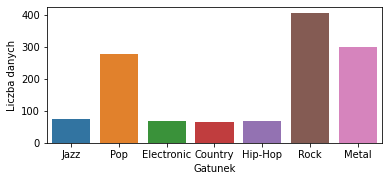

In [18]:
fig, ax = plt.subplots(figsize=(6, 2.5))
sns.countplot(x="general_genre", data=df, ax=ax)
plt.xlabel('Gatunek')
plt.ylabel('Liczba danych')
plt.savefig('genres.pdf', bbox_inches = "tight")

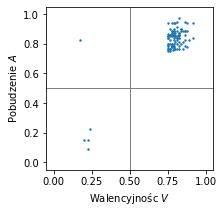

In [19]:
plt.subplots(figsize=(3, 3))
plt.scatter(df.valence_mean.values, df.arousal_mean.values, s=2)
plt.axhline(0.5, color='grey', lw=1)
plt.axvline(0.5, color='grey', lw=1)
margin=0.05
plt.ylim((0-margin, 1+margin))
plt.xlim((0-margin, 1+margin))
plt.xlabel(r'Walencyjnośc $V$')
plt.ylabel(r'Pobudzenie $A$')
plt.savefig('va_plot.pdf', bbox_inches = "tight")

In [20]:
train_df = pd.read_csv(os.path.join(dataset_path, 'train_dataset.csv'), index_col=0)
val_df = pd.read_csv(os.path.join(dataset_path, 'val_dataset.csv'), index_col=0)
test_df = pd.read_csv(os.path.join(dataset_path, 'test_dataset.csv'), index_col=0)

<AxesSubplot:xlabel='emotion_4Q', ylabel='count'>

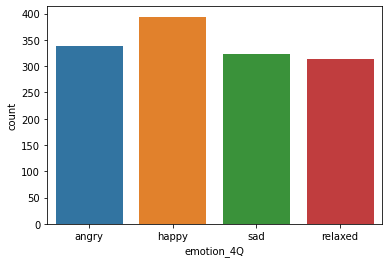

In [21]:
sns.countplot(x="emotion_4Q", data=train_df, order=['angry', 'happy', 'sad', 'relaxed'])

<AxesSubplot:xlabel='emotion_4Q', ylabel='count'>

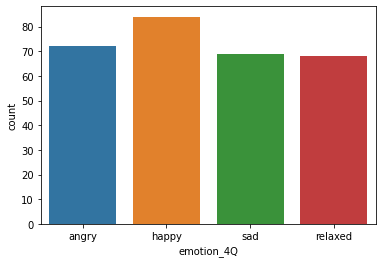

In [22]:
sns.countplot(x="emotion_4Q", data=val_df, order=['angry', 'happy', 'sad', 'relaxed'])

<AxesSubplot:xlabel='emotion_4Q', ylabel='count'>

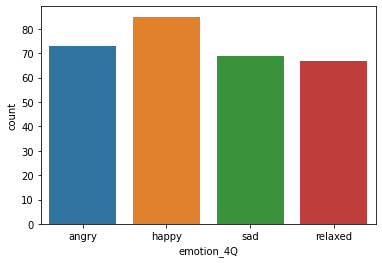

In [23]:
sns.countplot(x="emotion_4Q", data=test_df, order=['angry', 'happy', 'sad', 'relaxed'])